In [1]:
!pip install torch torchvision numpy matplotlib

In [2]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os

# Автоматическое определение устройства
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("✅ Using device:", device)

✅ Using device: cpu


In [3]:
# Schritt 1: Import der Bibliotheken
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import os
import shutil
import random
import csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import shutil
import random
import csv
from collections import defaultdict

# Paths to folders
source_dir = "/content/drive/MyDrive/ML_project/mammals"
output_dir = "/content/drive/MyDrive/ML_project/dataset_split"
os.makedirs(output_dir, exist_ok=True)

# Split proportions
splits = {"train": 0.7, "val": 0.15, "test": 0.15}

# Get list of classes
class_names = sorted([d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))])
class_to_id = {name: idx for idx, name in enumerate(class_names)}

# Save class mapping
with open(os.path.join(output_dir, "class_mapping.csv"), mode="w", newline='', encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["class_name", "class_id"])
    for name, idx in class_to_id.items():
        writer.writerow([name, idx])

# Count images in each folder
split_counter = defaultdict(lambda: defaultdict(int))

# Distribute images into folders
for class_name in class_names:
    class_id = class_to_id[class_name]
    class_folder = os.path.join(source_dir, class_name)

    images = [f for f in os.listdir(class_folder) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    random.shuffle(images)

    total = len(images)
    if total < 3:
        print(f"⚠️ Пропущен класс '{class_name}', слишком мало images: {total}")
        continue

    n_train = int(total * splits["train"])
    n_val   = int(total * splits["val"])
    n_test  = total - n_train - n_val  # remainder to test

    split_data = {
        "train": images[:n_train],
        "val": images[n_train:n_train + n_val],
        "test": images[n_train + n_val:]
    }

    for split_name, file_list in split_data.items():
        split_class_dir = os.path.join(output_dir, split_name, str(class_id))
        os.makedirs(split_class_dir, exist_ok=True)

        for file_name in file_list:
            src = os.path.join(class_folder, file_name)
            dst = os.path.join(split_class_dir, file_name)
            shutil.copy2(src, dst)
            split_counter[split_name][class_name] += 1

print("\n📊 Количество images по каждому классу:")
for split_name in ["train", "val", "test"]:
    print(f"\n📁 {split_name.upper()}:")
    for class_name in class_names:
        count = split_counter[split_name][class_name]
        print(f"  {class_name}: {count} images")

KeyboardInterrupt: 

In [ ]:
import os
import shutil

# Source folder with data
source_dir = "/content/drive/MyDrive/ML_project/dataset_split/train"
# Target folder for mini dataset
mini_dataset_dir = "/content/drive/MyDrive/ML_project/mini_dataset"

# Remove folder if it already exists
if os.path.exists(mini_dataset_dir):
    shutil.rmtree(mini_dataset_dir)

os.makedirs(mini_dataset_dir, exist_ok=True)

# Select first 10 classes (или замени на all_classes[-10:] для последних 10)
all_classes = sorted(os.listdir(source_dir))
selected_classes = all_classes[:10]  # ← change to [-10:] for last ones

print("🎯 Selected classes:", selected_classes)

# Copy 20 images from each class
for class_name in selected_classes:
    full_class_path = os.path.join(source_dir, class_name)
    all_images = [img for img in os.listdir(full_class_path) if img.lower().endswith(('.jpg', '.png', '.jpeg'))]

    if len(all_images) < 20:
        print(f"⚠️ Пропущен класс {class_name}: только {len(all_images)} images")
        continue

    selected_images = sorted(all_images)[:20]  # use [:20] or [-20:] for last 20

    for i, split in enumerate(["train"]*16 + ["val"]*2 + ["test"]*2):
        dst_dir = os.path.join(mini_dataset_dir, split, class_name)
        os.makedirs(dst_dir, exist_ok=True)

        src_path = os.path.join(full_class_path, selected_images[i])
        dst_path = os.path.join(dst_dir, selected_images[i])
        shutil.copy2(src_path, dst_path)

🎯 Selected classes: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17']


In [ ]:
# 4️⃣ Check image count in each folder for each class
from collections import defaultdict
mini_dataset_dir = "/content/drive/MyDrive/ML_project/mini_dataset"
print("\n📊 Количество images по папкам:")
print(f"{'Class':<20} {'Train':>6} {'Val':>6} {'Test':>6}")
print("-" * 40)

class_counts = defaultdict(lambda: {"train": 0, "val": 0, "test": 0})
splits = ["train", "val", "test"]

for split in splits:
    split_path = os.path.join(mini_dataset_dir, split)
    if not os.path.exists(split_path):
        continue
    for class_name in sorted(os.listdir(split_path)):
        class_folder = os.path.join(split_path, class_name)
        if not os.path.isdir(class_folder):
            continue
        num_images = len([f for f in os.listdir(class_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
        class_counts[class_name][split] = num_images

for class_name, counts in class_counts.items():
    print(f"{class_name:<20} {counts['train']:>6} {counts['val']:>6} {counts['test']:>6}")


📊 Количество изображений по папкам:
Class                 Train    Val   Test
----------------------------------------
0                        16      2      2
1                        16      2      2
10                       16      2      2
11                       16      2      2
12                       16      2      2
13                       16      2      2
14                       16      2      2
15                       16      2      2
16                       16      2      2
17                       16      2      2


In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

# Автоматическое определение устройства
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("💻 Using device:", device)

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load datasets
mini_dataset_dir = "/content/drive/MyDrive/ML_project/mini_dataset"

train_dataset = datasets.ImageFolder(os.path.join(mini_dataset_dir, "train"), transform=transform)
val_dataset   = datasets.ImageFolder(os.path.join(mini_dataset_dir, "val"),   transform=transform)
test_dataset  = datasets.ImageFolder(os.path.join(mini_dataset_dir, "test"),  transform=transform)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=4)
test_loader  = DataLoader(test_dataset, batch_size=4)

print(f"📊 Train: {len(train_dataset)}, Val: {len(val_dataset)}, Test: {len(test_dataset)}")
print("🔢 Num classes:", len(train_dataset.classes))

💻 Using device: cpu
📊 Train: 160, Val: 20, Test: 20
🔢 Num classes: 10


In [ ]:
data_de = [ ["Modell", "Convolutional Neural Network (CNN) mit 4 Convolutional Layers"], ["Eingabedaten", "RGB-Bilder mit Größe 64×64 Pixel"], ["Convolution-Schichten", "Conv2D (3→16), Conv2D (16→32), Conv2D (32→64), Conv2D (64→128)"], ["Pooling", "MaxPool2D (2×2) nach jeder Convolution-Schicht"], ["Fully Connected Layer", "Linear(128×4×4, 10)"], ["Aktivierungsfunktion", "ReLU nach jeder Convolution"], ["Verlustfunktion", "Cross Entropy Loss (Mehrklassige Klassifikation)"], ["Optimierer", "Adam"], ["Lernrate", "0.001"], ["Batchgröße", "8"], ["Anzahl der Epochen", "200"], ["Datenteilung", "Training / Validierung / Test"], ["Transformation", "Resize (64×64) + ToTensor()"], ["Metriken", "Verlust (Loss), Genauigkeit (Accuracy)"], ["Gerät", "GPU wenn verfügbar, sonst CPU"], ["Modellspeicherung", "model.state_dict() → .pth Datei"] ]

data_de = [ ["Modell", "Convolutional Neural Network (CNN) mit 4 Convolutional Layers"], ["Eingabedaten", "RGB-Bilder mit Größe 64×64 Pixel"], ["Convolution-Schichten", "Conv2D (3→16), Conv2D (16→32), Conv2D (32→64), Conv2D (64→128)"], ["Pooling", "MaxPool2D (2×2) nach jeder Convolution-Schicht"], ["Fully Connected Layer", "Linear(128×4×4, 10)"], ["Aktivierungsfunktion", "ReLU nach jeder Convolution"], ["Verlustfunktion", "Cross Entropy Loss (Mehrklassige Klassifikation)"], ["Optimierer", "Adam"], ["Lernrate", "0.001"], ["Batchgröße", "8"], ["Anzahl der Epochen", "200"], ["Datenteilung", "Training / Validierung / Test"], ["Transformation", "Resize (64×64) + ToTensor()"], ["Metriken", "Verlust (Loss), Genauigkeit (Accuracy)"], ["Gerät", "GPU wenn verfügbar, sonst CPU"], ["Modellspeicherung", "model.state_dict() → .pth Datei"] ]

import pandas as pd
df_de = pd.DataFrame(data_de, columns=["Kategorie", "Beschreibung"])
styled = df_de.style.set_properties(**{'text-align': 'left'})
styled.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

display(styled)

,Kategorie,Beschreibung
0,Modell,Convolutional Neural Network (CNN) mit 4 Convolutional Layers
1,Eingabedaten,RGB-Bilder mit Größe 64×64 Pixel
2,Convolution-Schichten,"Conv2D (3→16), Conv2D (16→32), Conv2D (32→64), Conv2D (64→128)"
3,Pooling,MaxPool2D (2×2) nach jeder Convolution-Schicht
4,Fully Connected Layer,"Linear(128×4×4, 10)"
5,Aktivierungsfunktion,ReLU nach jeder Convolution
6,Verlustfunktion,Cross Entropy Loss (Mehrklassige Klassifikation)
7,Optimierer,Adam
8,Lernrate,0.001
9,Batchgröße,8


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
mini_dataset_dir = "/content/drive/MyDrive/ML_project/mini_dataset"

# Transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder(os.path.join(mini_dataset_dir, "train"), transform=transform)
val_dataset   = datasets.ImageFolder(os.path.join(mini_dataset_dir, "val"), transform=transform)
test_dataset  = datasets.ImageFolder(os.path.join(mini_dataset_dir, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=8)
test_loader  = DataLoader(test_dataset, batch_size=8)

# CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(128 * 4 * 4, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = self.fc(x)
        return x

# Initialization
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists for storing metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Model training
for epoch in range(200):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_acc = 100 * correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total

    # Сохраняем метрики
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

# Final testing
model.eval()
test_correct, test_total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_acc = 100 * test_correct / test_total
print(f"\n✅ Test Accuracy: {test_acc:.2f}%")

Epoch 1, Train Loss: 2.3165, Train Accuracy: 6.25%, Val Loss: 2.3018, Val Accuracy: 10.00%
Epoch 2, Train Loss: 2.3018, Train Accuracy: 9.38%, Val Loss: 2.2983, Val Accuracy: 5.00%
Epoch 3, Train Loss: 2.2877, Train Accuracy: 15.00%, Val Loss: 2.2345, Val Accuracy: 25.00%
Epoch 4, Train Loss: 2.2375, Train Accuracy: 15.00%, Val Loss: 2.1640, Val Accuracy: 20.00%
Epoch 5, Train Loss: 2.1645, Train Accuracy: 23.12%, Val Loss: 2.0332, Val Accuracy: 25.00%
Epoch 6, Train Loss: 2.0443, Train Accuracy: 21.88%, Val Loss: 1.9495, Val Accuracy: 25.00%
Epoch 7, Train Loss: 1.9645, Train Accuracy: 30.62%, Val Loss: 1.9340, Val Accuracy: 25.00%
Epoch 8, Train Loss: 1.8766, Train Accuracy: 31.25%, Val Loss: 1.9061, Val Accuracy: 25.00%
Epoch 9, Train Loss: 1.7263, Train Accuracy: 36.88%, Val Loss: 2.0467, Val Accuracy: 20.00%
Epoch 10, Train Loss: 1.6429, Train Accuracy: 36.25%, Val Loss: 1.9524, Val Accuracy: 20.00%
Epoch 11, Train Loss: 1.5272, Train Accuracy: 44.38%, Val Loss: 2.0613, Val Accura

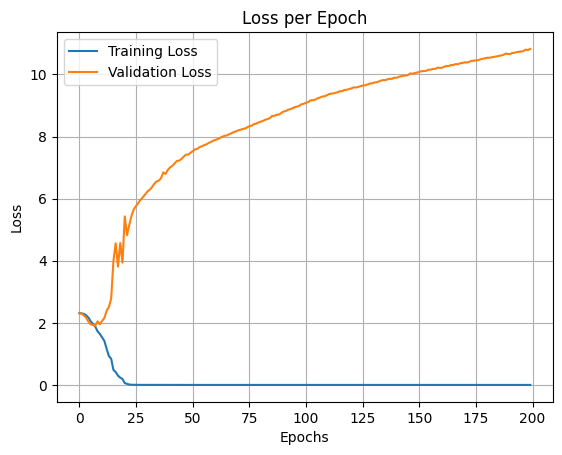

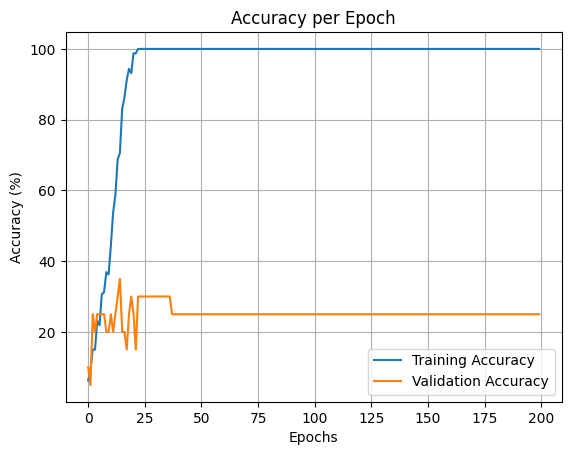

In [ ]:
# Metrics visualization
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_save_path = "/content/drive/MyDrive/ML_project/cnn_model_weights_model_1.pth"
torch.save(model.state_dict(), model_save_path)
print(f"💾 Модель успешно сохранена по пути: {model_save_path}")

💾 Модель успешно сохранена по пути: /content/drive/MyDrive/ML_project/cnn_model_weights_model_1.pth


In [30]:
import pandas as pd

# Data for table
data_dropout = [
    ["Modell", "Convolutional Neural Network (CNN) mit 4 Convolutional Layers und Dropout"],
    ["Eingabedaten", "RGB-Bilder mit Größe 64×64 Pixel"],
    ["Convolution-Schichten", "Conv2D (3→16), Conv2D (16→32), Conv2D (32→64), Conv2D (64→128)"],
    ["Pooling", "MaxPool2D (2×2) nach jeder Convolution-Schicht"],
    ["Dropout", "Dropout(0.25) nach Conv2 & Conv4, Dropout(0.5) vor Ausgabe"],
    ["Fully Connected Layer", "Linear(128×4×4 → 256), Linear(256 → 10)"],
    ["Aktivierungsfunktion", "ReLU nach jeder Convolution"],
    ["Verlustfunktion", "Cross Entropy Loss (Mehrklassige Klassifikation)"],
    ["Optimierer", "Adam"],
    ["Lernrate", "0.001"],
    ["Batchgröße", "8"],
    ["Anzahl der Epochen", "200"],
    ["Datenteilung", "Training / Validierung / Test"],
    ["Transformation", "Resize (64×64) + ToTensor()"],
    ["Metriken", "Verlust (Loss), Genauigkeit (Accuracy)"],
    ["Gerät", "GPU wenn verfügbar, sonst CPU"],
    ["Modellspeicherung", "model.state_dict() → .pth Datei"]
]

# Build table
df_dropout = pd.DataFrame(data_dropout, columns=["Kategorie", "Beschreibung"])
styled = df_dropout.style.set_properties(**{'text-align': 'left'})
styled.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

display(styled)

,Kategorie,Beschreibung
0,Modell,Convolutional Neural Network (CNN) mit 4 Convolutional Layers und Dropout
1,Eingabedaten,RGB-Bilder mit Größe 64×64 Pixel
2,Convolution-Schichten,"Conv2D (3→16), Conv2D (16→32), Conv2D (32→64), Conv2D (64→128)"
3,Pooling,MaxPool2D (2×2) nach jeder Convolution-Schicht
4,Dropout,"Dropout(0.25) nach Conv2 & Conv4, Dropout(0.5) vor Ausgabe"
5,Fully Connected Layer,"Linear(128×4×4 → 256), Linear(256 → 10)"
6,Aktivierungsfunktion,ReLU nach jeder Convolution
7,Verlustfunktion,Cross Entropy Loss (Mehrklassige Klassifikation)
8,Optimierer,Adam
9,Lernrate,0.001


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
mini_dataset_dir = "/content/drive/MyDrive/ML_project/mini_dataset"

# Transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder(os.path.join(mini_dataset_dir, "train"), transform=transform)
val_dataset   = datasets.ImageFolder(os.path.join(mini_dataset_dir, "val"), transform=transform)
test_dataset  = datasets.ImageFolder(os.path.join(mini_dataset_dir, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=8)
test_loader  = DataLoader(test_dataset, batch_size=8)

# CNN model
class CNNModelWithDropout(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModelWithDropout, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout(0.25)

        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.dropout4 = nn.Dropout(0.25)

        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.dropout_fc = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.dropout2(x)

        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = self.dropout4(x)

        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout_fc(x)
        x = self.fc2(x)
        return x

# Initialization
model = CNNModelWithDropout().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists for storing metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Model training
for epoch in range(200):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_acc = 100 * correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total

    # Сохраняем метрики
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

# Final testing
model.eval()
test_correct, test_total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_acc = 100 * test_correct / test_total
print(f"\n✅ Test Accuracy: {test_acc:.2f}%")

Epoch 1, Train Loss: 2.3160, Train Accuracy: 6.25%, Val Loss: 2.3052, Val Accuracy: 10.00%
Epoch 2, Train Loss: 2.3043, Train Accuracy: 8.12%, Val Loss: 2.3035, Val Accuracy: 10.00%
Epoch 3, Train Loss: 2.3032, Train Accuracy: 10.00%, Val Loss: 2.2994, Val Accuracy: 15.00%
Epoch 4, Train Loss: 2.2801, Train Accuracy: 14.38%, Val Loss: 2.1735, Val Accuracy: 10.00%
Epoch 5, Train Loss: 2.1907, Train Accuracy: 14.38%, Val Loss: 2.1271, Val Accuracy: 20.00%
Epoch 6, Train Loss: 2.1184, Train Accuracy: 22.50%, Val Loss: 2.0246, Val Accuracy: 20.00%
Epoch 7, Train Loss: 2.1157, Train Accuracy: 17.50%, Val Loss: 2.1912, Val Accuracy: 20.00%
Epoch 8, Train Loss: 2.1941, Train Accuracy: 20.00%, Val Loss: 2.1124, Val Accuracy: 20.00%
Epoch 9, Train Loss: 2.1335, Train Accuracy: 18.75%, Val Loss: 2.0249, Val Accuracy: 20.00%
Epoch 10, Train Loss: 2.0852, Train Accuracy: 19.38%, Val Loss: 2.0790, Val Accuracy: 20.00%
Epoch 11, Train Loss: 2.0106, Train Accuracy: 28.12%, Val Loss: 2.0497, Val Accur

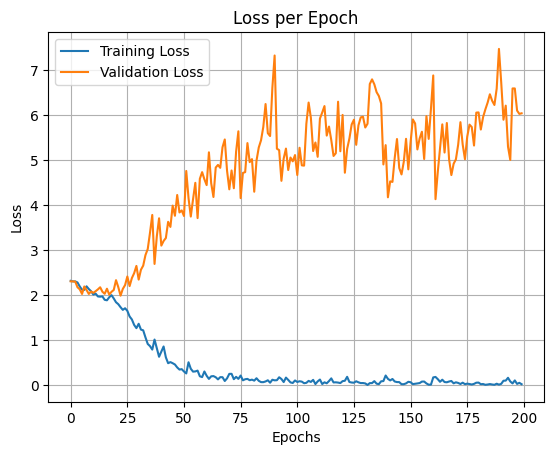

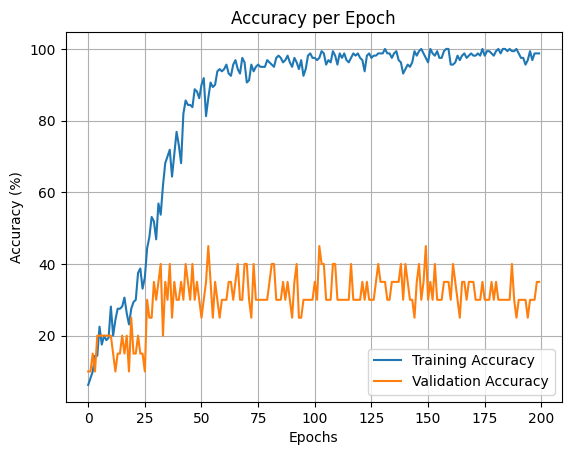

In [ ]:
# Metrics visualization
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_save_path = "/content/drive/MyDrive/ML_project/cnn_model_weights_model_2_DropOut.pth"
torch.save(model.state_dict(), model_save_path)
print(f"💾 Модель успешно сохранена по пути: {model_save_path}")

💾 Модель успешно сохранена по пути: /content/drive/MyDrive/ML_project/cnn_model_weights_model_2.pth


In [28]:
import pandas as pd

# Table for model with Early Stopping
data_earlystop = [
    ["Modell", "Convolutional Neural Network (CNN) mit 4 Convolutional Layers"],
    ["Eingabedaten", "RGB-Bilder mit Größe 64×64 Pixel"],
    ["Convolution-Schichten", "Conv2D (3→16), Conv2D (16→32), Conv2D (32→64), Conv2D (64→128)"],
    ["Pooling", "MaxPool2D (2×2) nach jeder Convolution-Schicht"],
    ["Fully Connected Layer", "Linear(128×4×4 → 10)"],
    ["Aktivierungsfunktion", "ReLU nach jeder Convolution"],
    ["Verlustfunktion", "Cross Entropy Loss (Mehrklassige Klassifikation)"],
    ["Optimierer", "Adam"],
    ["Lernrate", "0.001"],
    ["Batchgröße", "8"],
    ["Anzahl der Epochen", "200 (mit Early Stopping, Geduld = 10)"],
    ["Datenteilung", "Training / Validierung / Test"],
    ["Transformation", "Resize (64×64) + ToTensor()"],
    ["Metriken", "Verlust (Loss), Genauigkeit (Accuracy)"],
    ["Gerät", "GPU wenn verfügbar, sonst CPU"],
    ["Modellspeicherung", "Beste Modell → best_model.pth"]
]

data_earlystop = pd.DataFrame(data_es, columns=["Kategorie", "Beschreibung"])
styled_earlystop = df_es.style.set_properties(**{'text-align': 'left'})
styled_earlystop.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

display(styled_earlystop)

,Kategorie,Beschreibung
0,Modell,Convolutional Neural Network (CNN) mit 4 Convolutional Layers
1,Eingabedaten,RGB-Bilder mit Größe 64×64 Pixel
2,Convolution-Schichten,"Conv2D (3→16), Conv2D (16→32), Conv2D (32→64), Conv2D (64→128)"
3,Pooling,MaxPool2D (2×2) nach jeder Convolution-Schicht
4,Fully Connected Layer,Linear(128×4×4 → 10)
5,Aktivierungsfunktion,ReLU nach jeder Convolution
6,Verlustfunktion,Cross Entropy Loss (Mehrklassige Klassifikation)
7,Optimierer,Adam
8,Lernrate,0.001
9,Batchgröße,8


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
mini_dataset_dir = "/content/drive/MyDrive/ML_project/mini_dataset"

# Transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder(os.path.join(mini_dataset_dir, "train"), transform=transform)
val_dataset   = datasets.ImageFolder(os.path.join(mini_dataset_dir, "val"), transform=transform)
test_dataset  = datasets.ImageFolder(os.path.join(mini_dataset_dir, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=8)
test_loader  = DataLoader(test_dataset, batch_size=8)

# CNN model
class CNNModelWithEarlyStopping(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModelWithEarlyStopping, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(128 * 4 * 4, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = self.fc(x)
        return x

# Initialization
model = CNNModelWithEarlyStopping().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists for storing metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Early Stopping parameters
best_val_loss = float("inf")
patience = 10
counter = 0

# Training with Early Stopping
for epoch in range(200):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_acc = 100 * correct / total

    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), "best_model.pth")  # save best model
    else:
        counter += 1
        if counter >= patience:
            print("\n⏹️ Early stopping triggered!")
            break

# Load best model
model.load_state_dict(torch.load("best_model.pth"))
model.eval()
test_correct, test_total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_acc = 100 * test_correct / test_total
print(f"\n📈 Test Accuracy: {test_acc:.2f}%")

Epoch 1, Train Loss: 2.3170, Train Accuracy: 6.88%, Val Loss: 2.2979, Val Accuracy: 10.00%
Epoch 2, Train Loss: 2.3030, Train Accuracy: 8.12%, Val Loss: 2.2997, Val Accuracy: 15.00%
Epoch 3, Train Loss: 2.2981, Train Accuracy: 10.62%, Val Loss: 2.2567, Val Accuracy: 10.00%
Epoch 4, Train Loss: 2.2125, Train Accuracy: 15.00%, Val Loss: 2.1771, Val Accuracy: 15.00%
Epoch 5, Train Loss: 2.1248, Train Accuracy: 25.00%, Val Loss: 2.0068, Val Accuracy: 20.00%
Epoch 6, Train Loss: 2.0675, Train Accuracy: 20.00%, Val Loss: 2.0860, Val Accuracy: 15.00%
Epoch 7, Train Loss: 1.9909, Train Accuracy: 25.62%, Val Loss: 1.9845, Val Accuracy: 30.00%
Epoch 8, Train Loss: 1.9611, Train Accuracy: 28.12%, Val Loss: 2.1036, Val Accuracy: 20.00%
Epoch 9, Train Loss: 1.8461, Train Accuracy: 31.25%, Val Loss: 2.4281, Val Accuracy: 15.00%
Epoch 10, Train Loss: 1.7661, Train Accuracy: 31.88%, Val Loss: 2.6174, Val Accuracy: 15.00%
Epoch 11, Train Loss: 1.6641, Train Accuracy: 40.00%, Val Loss: 2.5347, Val Accur

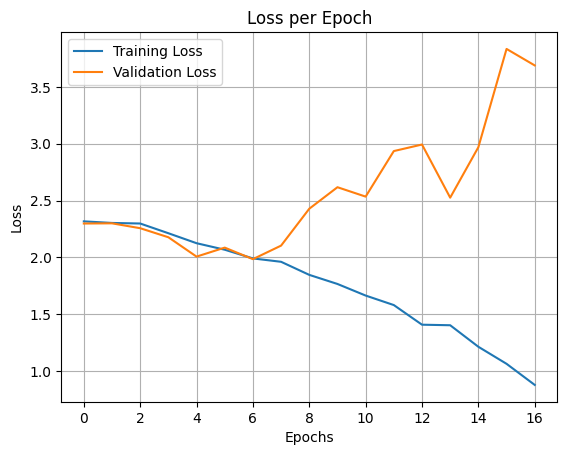

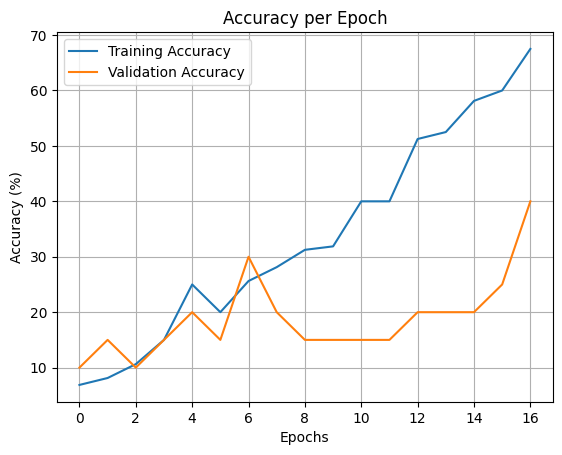

In [ ]:
# Metrics visualization
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_save_path = "/content/drive/MyDrive/ML_project/cnn_model_weights_model_3_EarlyStop.pth"
torch.save(model.state_dict(), model_save_path)
print(f"💾 Модель успешно сохранена по пути: {model_save_path}")

💾 Модель успешно сохранена по пути: /content/drive/MyDrive/ML_project/cnn_model_weights_model_3.pth


In [18]:
import pandas as pd

# Model table for Filter32
data_filter32 = [
    ["Modell", "Convolutional Neural Network (CNN) mit 4 Convolutional Layers"],
    ["Eingabedaten", "RGB-Bilder mit Größe 64×64 Pixel"],
    ["Convolution-Schichten", "Conv2D (3→32), Conv2D (32→64), Conv2D (64→128), Conv2D (128→256)"],
    ["Pooling", "MaxPool2D (2×2) nach jeder Convolution-Schicht"],
    ["Fully Connected Layer", "Linear(256×4×4 → 10)"],
    ["Aktivierungsfunktion", "ReLU nach jeder Convolution"],
    ["Verlustfunktion", "Cross Entropy Loss (Mehrklassige Klassifikation)"],
    ["Optimierer", "Adam"],
    ["Lernrate", "0.001"],
    ["Batchgröße", "8"],
    ["Anzahl der Epochen", "100"],
    ["Datenteilung", "Training / Validierung / Test"],
    ["Transformation", "Resize (64×64) + ToTensor()"],
    ["Metriken", "Verlust (Loss), Genauigkeit (Accuracy)"],
    ["Gerät", "GPU wenn verfügbar, sonst CPU"],
    ["Modellspeicherung", "Nicht angegeben (nicht gespeichert)"]
]

df_filter32 = pd.DataFrame(data_filter32, columns=["Kategorie", "Beschreibung"])
styled_filter32 = df_filter32.style.set_properties(**{'text-align': 'left'})
styled_filter32.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

display(styled_filter32)

,Kategorie,Beschreibung
0,Modell,Convolutional Neural Network (CNN) mit 4 Convolutional Layers
1,Eingabedaten,RGB-Bilder mit Größe 64×64 Pixel
2,Convolution-Schichten,"Conv2D (3→32), Conv2D (32→64), Conv2D (64→128), Conv2D (128→256)"
3,Pooling,MaxPool2D (2×2) nach jeder Convolution-Schicht
4,Fully Connected Layer,Linear(256×4×4 → 10)
5,Aktivierungsfunktion,ReLU nach jeder Convolution
6,Verlustfunktion,Cross Entropy Loss (Mehrklassige Klassifikation)
7,Optimierer,Adam
8,Lernrate,0.001
9,Batchgröße,8


Epoch 1, Train Loss: 2.3107, Train Accuracy: 8.12%, Val Loss: 2.2528, Val Accuracy: 10.00%
Epoch 2, Train Loss: 2.2072, Train Accuracy: 15.00%, Val Loss: 2.0190, Val Accuracy: 20.00%
Epoch 3, Train Loss: 2.1125, Train Accuracy: 19.38%, Val Loss: 1.9977, Val Accuracy: 20.00%
Epoch 4, Train Loss: 2.0302, Train Accuracy: 24.38%, Val Loss: 2.2970, Val Accuracy: 20.00%
Epoch 5, Train Loss: 1.9753, Train Accuracy: 22.50%, Val Loss: 2.0417, Val Accuracy: 25.00%
Epoch 6, Train Loss: 1.9151, Train Accuracy: 28.12%, Val Loss: 2.3226, Val Accuracy: 20.00%
Epoch 7, Train Loss: 1.9025, Train Accuracy: 27.50%, Val Loss: 2.0365, Val Accuracy: 25.00%
Epoch 8, Train Loss: 1.8237, Train Accuracy: 32.50%, Val Loss: 1.8434, Val Accuracy: 20.00%
Epoch 9, Train Loss: 1.6918, Train Accuracy: 33.12%, Val Loss: 2.0998, Val Accuracy: 20.00%
Epoch 10, Train Loss: 1.5201, Train Accuracy: 41.88%, Val Loss: 2.3475, Val Accuracy: 20.00%
Epoch 11, Train Loss: 1.4366, Train Accuracy: 42.50%, Val Loss: 2.2882, Val Accu

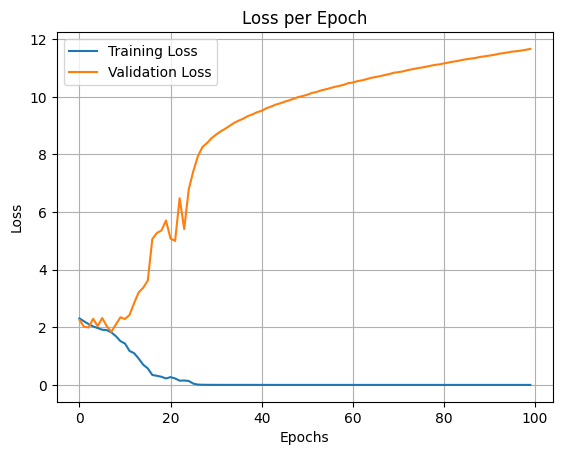

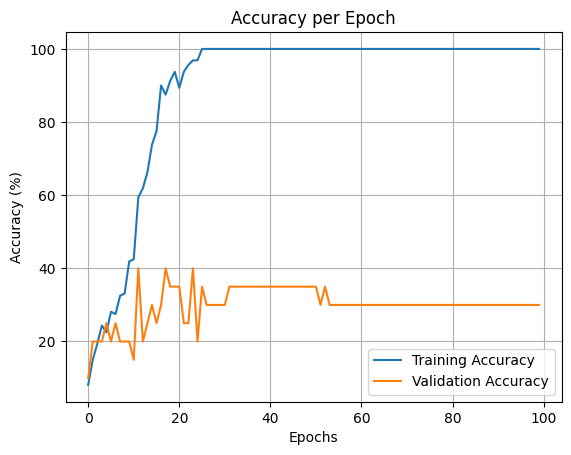

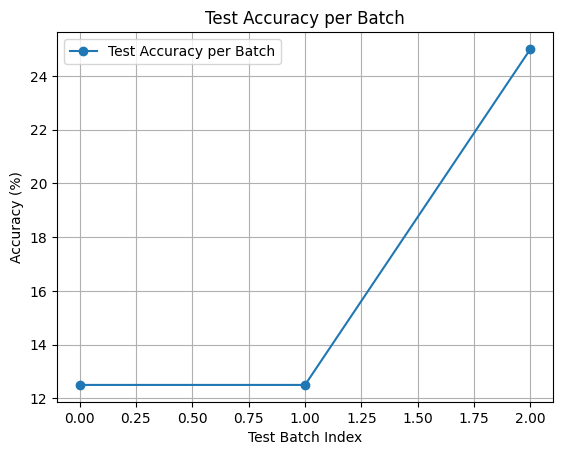

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
mini_dataset_dir = "/content/drive/MyDrive/ML_project/mini_dataset"

# Transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder(os.path.join(mini_dataset_dir, "train"), transform=transform)
val_dataset   = datasets.ImageFolder(os.path.join(mini_dataset_dir, "val"), transform=transform)
test_dataset  = datasets.ImageFolder(os.path.join(mini_dataset_dir, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=8)
test_loader  = DataLoader(test_dataset, batch_size=8)

# CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(256 * 4 * 4, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = x.view(-1, 256 * 4 * 4)
        x = self.fc(x)
        return x

# Initialization
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists for storing metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
test_losses = []
test_accuracies = []
test_batch_indices = []

# Model training
for epoch in range(100):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_acc = 100 * correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total

    # Сохраняем метрики
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

# Final testing
model.eval()
test_loss, test_correct, test_total = 0, 0, 0
with torch.no_grad():
    for idx, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        acc = 100 * (predicted == labels).sum().item() / labels.size(0)
        test_batch_indices.append(idx)
        test_accuracies.append(acc)

test_loss /= len(test_loader)
total_test_acc = 100 * test_correct / test_total
print(f"\n✅ Test Accuracy: {total_test_acc:.2f}%")

# Metrics visualization
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot of test accuracy per batch
plt.plot(test_batch_indices, test_accuracies, marker='o', linestyle='-', label='Test Accuracy per Batch')
plt.xlabel('Test Batch Index')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy per Batch')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model_save_path = "/content/drive/MyDrive/ML_project/cnn_model_weights_model_4_Filter_32.pth"
torch.save(model.state_dict(), model_save_path)
print(f"💾 Модель успешно сохранена по пути: {model_save_path}")

💾 Модель успешно сохранена по пути: /content/drive/MyDrive/ML_project/cnn_model_weights_model_4.pth


In [19]:
import pandas as pd

# Model parameters with 128x128 images
data_128x128 = [
    ["Modell", "Convolutional Neural Network (CNN) mit 4 Convolutional Layers"],
    ["Eingabedaten", "RGB-Bilder mit Größe 128×128 Pixel"],
    ["Convolution-Schichten", "Conv2D (3→32), Conv2D (32→64), Conv2D (64→128), Conv2D (128→256)"],
    ["Pooling", "MaxPool2D (2×2) nach jeder Convolution-Schicht"],
    ["Fully Connected Layer", "Linear(256×8×8 → 10)"],
    ["Aktivierungsfunktion", "ReLU nach jeder Convolution"],
    ["Verlustfunktion", "Cross Entropy Loss (Mehrklassige Klassifikation)"],
    ["Optimierer", "Adam"],
    ["Lernrate", "0.001"],
    ["Batchgröße", "8"],
    ["Anzahl der Epochen", "100"],
    ["Datenteilung", "Training / Validierung / Test"],
    ["Transformation", "Resize (128×128) + ToTensor()"],
    ["Metriken", "Verlust (Loss), Genauigkeit (Accuracy)"],
    ["Gerät", "GPU wenn verfügbar, sonst CPU"],
    ["Modellspeicherung", "Nicht angegeben (nicht gespeichert)"]
]

df_128x128 = pd.DataFrame(data_128x128, columns=["Kategorie", "Beschreibung"])
styled_128x128 = df_128x128.style.set_properties(**{'text-align': 'left'})
styled_128x128.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

display(styled_128x128)

,Kategorie,Beschreibung
0,Modell,Convolutional Neural Network (CNN) mit 4 Convolutional Layers
1,Eingabedaten,RGB-Bilder mit Größe 128×128 Pixel
2,Convolution-Schichten,"Conv2D (3→32), Conv2D (32→64), Conv2D (64→128), Conv2D (128→256)"
3,Pooling,MaxPool2D (2×2) nach jeder Convolution-Schicht
4,Fully Connected Layer,Linear(256×8×8 → 10)
5,Aktivierungsfunktion,ReLU nach jeder Convolution
6,Verlustfunktion,Cross Entropy Loss (Mehrklassige Klassifikation)
7,Optimierer,Adam
8,Lernrate,0.001
9,Batchgröße,8


Epoch 1, Train Loss: 2.3133, Train Accuracy: 7.50%, Val Loss: 2.2996, Val Accuracy: 10.00%
Epoch 2, Train Loss: 2.3024, Train Accuracy: 13.12%, Val Loss: 2.2856, Val Accuracy: 20.00%
Epoch 3, Train Loss: 2.2258, Train Accuracy: 16.25%, Val Loss: 2.3650, Val Accuracy: 20.00%
Epoch 4, Train Loss: 2.0496, Train Accuracy: 23.75%, Val Loss: 2.0716, Val Accuracy: 15.00%
Epoch 5, Train Loss: 1.9893, Train Accuracy: 25.00%, Val Loss: 1.9916, Val Accuracy: 30.00%
Epoch 6, Train Loss: 1.8669, Train Accuracy: 31.25%, Val Loss: 2.1473, Val Accuracy: 15.00%
Epoch 7, Train Loss: 1.7472, Train Accuracy: 36.88%, Val Loss: 2.0657, Val Accuracy: 20.00%
Epoch 8, Train Loss: 1.7520, Train Accuracy: 33.12%, Val Loss: 2.3334, Val Accuracy: 20.00%
Epoch 9, Train Loss: 1.6376, Train Accuracy: 40.62%, Val Loss: 2.0392, Val Accuracy: 20.00%
Epoch 10, Train Loss: 1.6775, Train Accuracy: 38.12%, Val Loss: 2.1499, Val Accuracy: 30.00%
Epoch 11, Train Loss: 1.4676, Train Accuracy: 50.00%, Val Loss: 3.4283, Val Accu

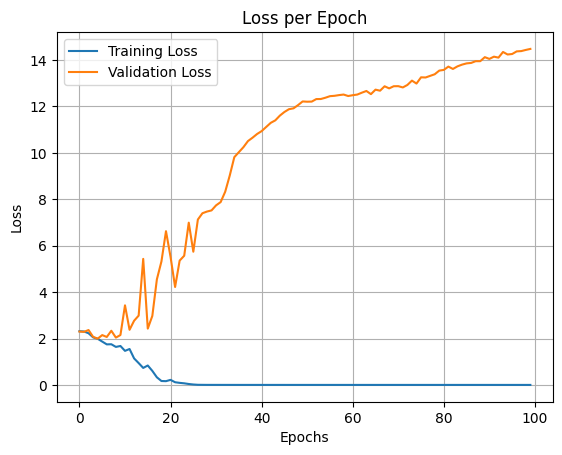

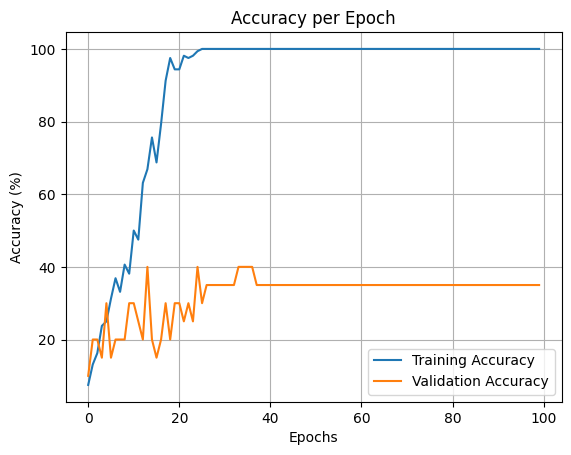

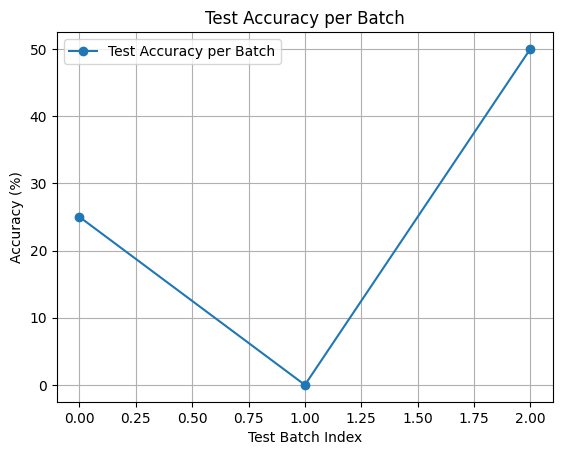

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
mini_dataset_dir = "/content/drive/MyDrive/ML_project/mini_dataset"

# Transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder(os.path.join(mini_dataset_dir, "train"), transform=transform)
val_dataset   = datasets.ImageFolder(os.path.join(mini_dataset_dir, "val"), transform=transform)
test_dataset  = datasets.ImageFolder(os.path.join(mini_dataset_dir, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=8)
test_loader  = DataLoader(test_dataset, batch_size=8)

# CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(256 * 8 * 8, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = x.view(-1, 256 * 8 * 8)
        x = self.fc(x)
        return x

# Initialization
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists for storing metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
test_losses = []
test_accuracies = []
test_batch_indices = []

# Model training
for epoch in range(100):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_acc = 100 * correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total

    # Сохраняем метрики
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

# Final testing
model.eval()
test_loss, test_correct, test_total = 0, 0, 0
with torch.no_grad():
    for idx, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        acc = 100 * (predicted == labels).sum().item() / labels.size(0)
        test_batch_indices.append(idx)
        test_accuracies.append(acc)

test_loss /= len(test_loader)
total_test_acc = 100 * test_correct / test_total
print(f"\n✅ Test Accuracy: {total_test_acc:.2f}%")

# Metrics visualization
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot of test accuracy per batch
plt.plot(test_batch_indices, test_accuracies, marker='o', linestyle='-', label='Test Accuracy per Batch')
plt.xlabel('Test Batch Index')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy per Batch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_save_path = "/content/drive/MyDrive/ML_project/cnn_model_weights_model_5_Size_128.pth"
torch.save(model.state_dict(), model_save_path)
print(f"💾 Модель успешно сохранена по пути: {model_save_path}")

💾 Модель успешно сохранена по пути: /content/drive/MyDrive/ML_project/cnn_model_weights_model_5.pth


In [20]:
import pandas as pd

data_modell128_l2 = [
    ["Modell", "Convolutional Neural Network (CNN) mit 4 Convolutional Layers"],
    ["Eingabedaten", "RGB-Bilder mit Größe 128×128 Pixel"],
    ["Convolution-Schichten", "Conv2D (3→32), Conv2D (32→64), Conv2D (64→128), Conv2D (128→256)"],
    ["Pooling", "MaxPool2D (2×2) nach jeder Convolution-Schicht"],
    ["Fully Connected Layer", "Linear(256×8×8 → 10)"],
    ["Aktivierungsfunktion", "ReLU nach jeder Convolution"],
    ["Verlustfunktion", "Cross Entropy Loss"],
    ["Optimierer", "Adam"],
    ["Lernrate", "0.001"],
    ["L2-Regularisierung (Weight Decay)", "1e-3"],
    ["Batchgröße", "8"],
    ["Anzahl der Epochen", "100"],
    ["Datenteilung", "Training / Validierung / Test"],
    ["Transformation", "Resize (128×128) + ToTensor()"],
    ["Metriken", "Verlust (Loss), Genauigkeit (Accuracy)"],
    ["Gerät", "GPU wenn verfügbar, sonst CPU"],
    ["Modellspeicherung", "Nicht gespeichert"]
]

df_modell128_l2 = pd.DataFrame(data_modell128_l2, columns=["Kategorie", "Beschreibung"])
styled_modell128_l2 = df_modell128_l2.style.set_properties(**{'text-align': 'left'})
styled_modell128_l2.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

display(styled_modell128_l2)

,Kategorie,Beschreibung
0,Modell,Convolutional Neural Network (CNN) mit 4 Convolutional Layers
1,Eingabedaten,RGB-Bilder mit Größe 128×128 Pixel
2,Convolution-Schichten,"Conv2D (3→32), Conv2D (32→64), Conv2D (64→128), Conv2D (128→256)"
3,Pooling,MaxPool2D (2×2) nach jeder Convolution-Schicht
4,Fully Connected Layer,Linear(256×8×8 → 10)
5,Aktivierungsfunktion,ReLU nach jeder Convolution
6,Verlustfunktion,Cross Entropy Loss
7,Optimierer,Adam
8,Lernrate,0.001
9,L2-Regularisierung (Weight Decay),1e-3


Epoch 1, Train Loss: 2.3184, Train Accuracy: 6.88%, Val Loss: 2.3018, Val Accuracy: 10.00%
Epoch 2, Train Loss: 2.3029, Train Accuracy: 5.62%, Val Loss: 2.3010, Val Accuracy: 5.00%
Epoch 3, Train Loss: 2.3060, Train Accuracy: 9.38%, Val Loss: 2.3013, Val Accuracy: 10.00%
Epoch 4, Train Loss: 2.3158, Train Accuracy: 8.75%, Val Loss: 2.3004, Val Accuracy: 10.00%
Epoch 5, Train Loss: 2.3019, Train Accuracy: 8.12%, Val Loss: 2.2852, Val Accuracy: 15.00%
Epoch 6, Train Loss: 2.2312, Train Accuracy: 16.88%, Val Loss: 2.2024, Val Accuracy: 20.00%
Epoch 7, Train Loss: 2.1511, Train Accuracy: 23.12%, Val Loss: 2.1417, Val Accuracy: 15.00%
Epoch 8, Train Loss: 2.0271, Train Accuracy: 30.62%, Val Loss: 1.9678, Val Accuracy: 20.00%
Epoch 9, Train Loss: 1.7409, Train Accuracy: 36.88%, Val Loss: 2.1867, Val Accuracy: 15.00%
Epoch 10, Train Loss: 1.5716, Train Accuracy: 46.88%, Val Loss: 2.1111, Val Accuracy: 15.00%
Epoch 11, Train Loss: 1.4136, Train Accuracy: 51.25%, Val Loss: 2.2891, Val Accuracy:

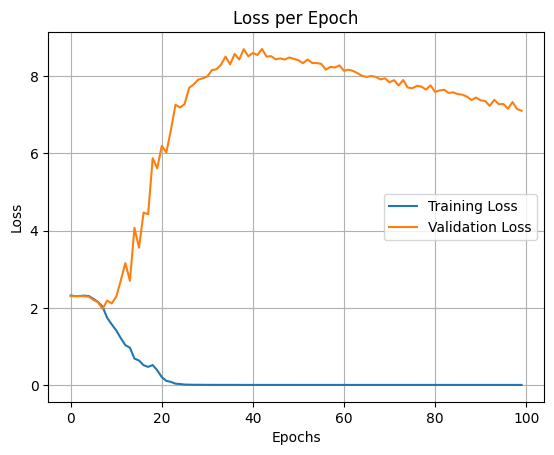

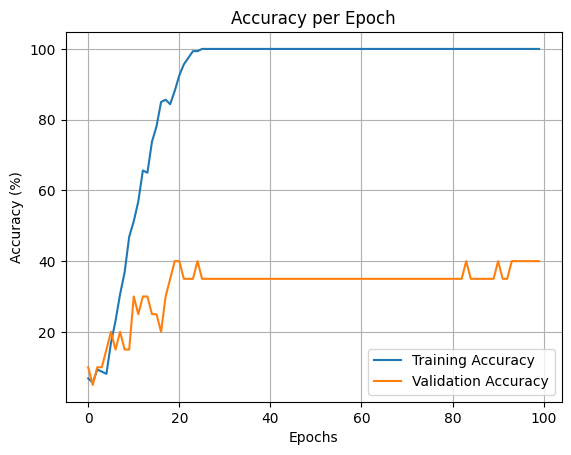

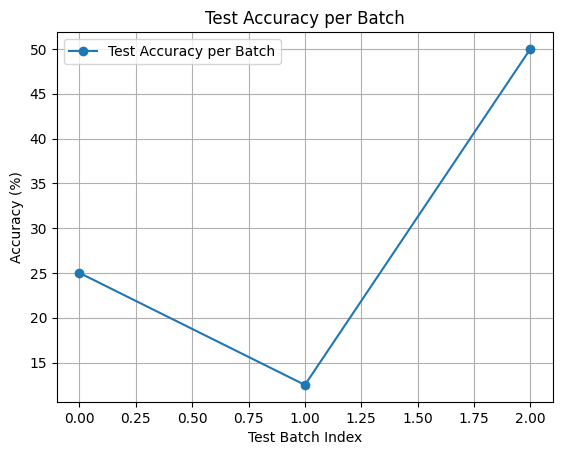

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
mini_dataset_dir = "/content/drive/MyDrive/ML_project/mini_dataset"

# Transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder(os.path.join(mini_dataset_dir, "train"), transform=transform)
val_dataset   = datasets.ImageFolder(os.path.join(mini_dataset_dir, "val"), transform=transform)
test_dataset  = datasets.ImageFolder(os.path.join(mini_dataset_dir, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=8)
test_loader  = DataLoader(test_dataset, batch_size=8)

# CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(256 * 8 * 8, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = x.view(-1, 256 * 8 * 8)
        x = self.fc(x)
        return x

# Initialization
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Lists for storing metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
test_losses = []
test_accuracies = []
test_batch_indices = []

# Model training
for epoch in range(100):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_acc = 100 * correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total

    # Сохраняем метрики
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

# Final testing
model.eval()
test_loss, test_correct, test_total = 0, 0, 0
with torch.no_grad():
    for idx, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        acc = 100 * (predicted == labels).sum().item() / labels.size(0)
        test_batch_indices.append(idx)
        test_accuracies.append(acc)

test_loss /= len(test_loader)
total_test_acc = 100 * test_correct / test_total
print(f"\n✅ Test Accuracy: {total_test_acc:.2f}%")

# Metrics visualization
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot of test accuracy per batch
plt.plot(test_batch_indices, test_accuracies, marker='o', linestyle='-', label='Test Accuracy per Batch')
plt.xlabel('Test Batch Index')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy per Batch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_save_path = "/content/drive/MyDrive/ML_project/cnn_model_weights_model_BatchNorm_WeightDeclay_L2.pth"
torch.save(model.state_dict(), model_save_path)
print(f"💾 Модель успешно сохранена по пути: {model_save_path}")

💾 Модель успешно сохранена по пути: /content/drive/MyDrive/ML_project/cnn_model_weights_model_BatchNorm.pth


In [22]:
import pandas as pd

data_augmented128 = [
    ["Modell", "Convolutional Neural Network (CNN) mit 4 Convolutional Layers"],
    ["Eingabedaten", "RGB-Bilder mit Größe 128×128 Pixel"],
    ["Convolution-Schichten", "Conv2D (3→32), Conv2D (32→64), Conv2D (64→128), Conv2D (128→256)"],
    ["Pooling", "MaxPool2D (2×2) nach jeder Convolution-Schicht"],
    ["Fully Connected Layer", "Linear(256×8×8 → 10)"],
    ["Aktivierungsfunktion", "ReLU nach jeder Convolution"],
    ["Verlustfunktion", "Cross Entropy Loss"],
    ["Optimierer", "Adam"],
    ["Lernrate", "0.001"],
    ["Batchgröße", "8"],
    ["Anzahl der Epochen", "100"],
    ["Datenteilung", "Training / Validierung / Test"],
    ["Trainingstransformationen", "Resize(128×128), RandomHorizontalFlip(), RandomRotation(10°), ColorJitter, RandomAffine, ToTensor()"],
    ["Validierung/Test Transformationen", "Resize(128×128), ToTensor()"],
    ["Metriken", "Verlust (Loss), Genauigkeit (Accuracy)"],
    ["Gerät", "GPU wenn verfügbar, sonst CPU"],
    ["Modellspeicherung", "Nicht gespeichert"]
]

df_augmented128 = pd.DataFrame(data_augmented128, columns=["Kategorie", "Beschreibung"])
styled_augmented128 = df_augmented128.style.set_properties(**{'text-align': 'left'})
styled_augmented128.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

display(styled_augmented128)

,Kategorie,Beschreibung
0,Modell,Convolutional Neural Network (CNN) mit 4 Convolutional Layers
1,Eingabedaten,RGB-Bilder mit Größe 128×128 Pixel
2,Convolution-Schichten,"Conv2D (3→32), Conv2D (32→64), Conv2D (64→128), Conv2D (128→256)"
3,Pooling,MaxPool2D (2×2) nach jeder Convolution-Schicht
4,Fully Connected Layer,Linear(256×8×8 → 10)
5,Aktivierungsfunktion,ReLU nach jeder Convolution
6,Verlustfunktion,Cross Entropy Loss
7,Optimierer,Adam
8,Lernrate,0.001
9,Batchgröße,8


Epoch 1, Train Loss: 2.3764, Train Accuracy: 8.12%, Val Loss: 2.3021, Val Accuracy: 10.00%
Epoch 2, Train Loss: 2.3036, Train Accuracy: 10.00%, Val Loss: 2.3019, Val Accuracy: 10.00%
Epoch 3, Train Loss: 2.3045, Train Accuracy: 7.50%, Val Loss: 2.2985, Val Accuracy: 15.00%
Epoch 4, Train Loss: 2.2926, Train Accuracy: 11.88%, Val Loss: 2.2493, Val Accuracy: 10.00%
Epoch 5, Train Loss: 2.2070, Train Accuracy: 11.25%, Val Loss: 2.1880, Val Accuracy: 10.00%
Epoch 6, Train Loss: 2.1476, Train Accuracy: 17.50%, Val Loss: 2.3365, Val Accuracy: 10.00%
Epoch 7, Train Loss: 2.1158, Train Accuracy: 16.88%, Val Loss: 2.0769, Val Accuracy: 10.00%
Epoch 8, Train Loss: 2.0655, Train Accuracy: 19.38%, Val Loss: 1.9718, Val Accuracy: 30.00%
Epoch 9, Train Loss: 1.9953, Train Accuracy: 28.12%, Val Loss: 2.3875, Val Accuracy: 15.00%
Epoch 10, Train Loss: 2.0040, Train Accuracy: 30.00%, Val Loss: 2.6825, Val Accuracy: 10.00%
Epoch 11, Train Loss: 1.9580, Train Accuracy: 26.25%, Val Loss: 2.1427, Val Accur

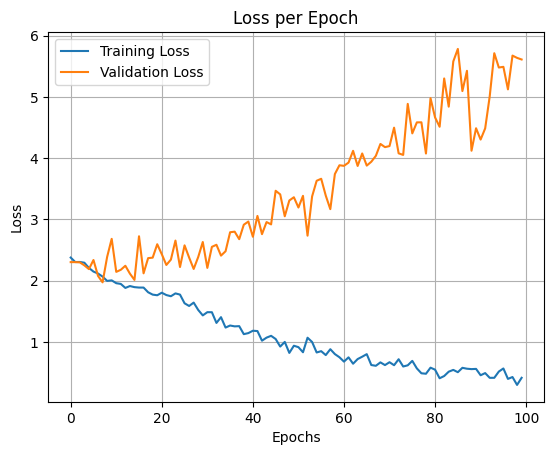

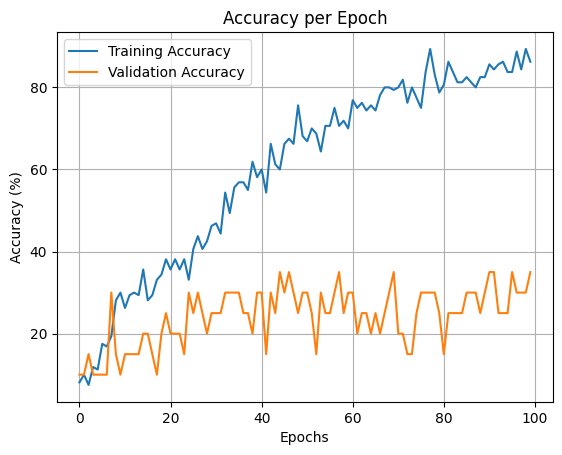

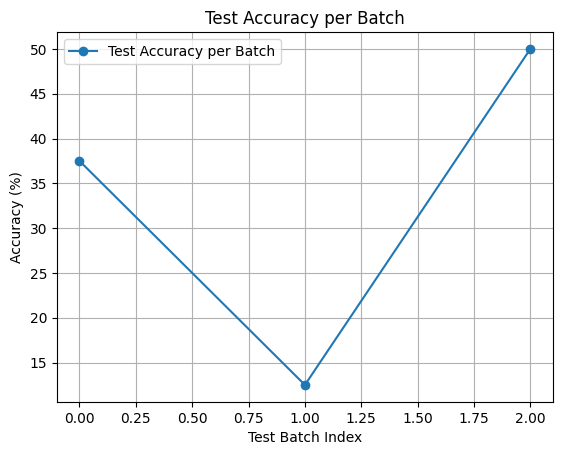

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
mini_dataset_dir = "/content/drive/MyDrive/ML_project/mini_dataset"

# Augmentations for training dataset
train_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor()
])

# No augmentations for validation and test
val_test_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder(os.path.join(mini_dataset_dir, "train"), transform=train_transform)
val_dataset   = datasets.ImageFolder(os.path.join(mini_dataset_dir, "val"), transform=val_test_transform)
test_dataset  = datasets.ImageFolder(os.path.join(mini_dataset_dir, "test"), transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=8)
test_loader  = DataLoader(test_dataset, batch_size=8)

# CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(256 * 8 * 8, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = x.view(-1, 256 * 8 * 8)
        x = self.fc(x)
        return x

# Initialization
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists for storing metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
test_losses = []
test_accuracies = []
test_batch_indices = []

# Model training
for epoch in range(100):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_acc = 100 * correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total

    # Сохраняем метрики
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

# Final testing
model.eval()
test_loss, test_correct, test_total = 0, 0, 0
with torch.no_grad():
    for idx, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        acc = 100 * (predicted == labels).sum().item() / labels.size(0)
        test_batch_indices.append(idx)
        test_accuracies.append(acc)

test_loss /= len(test_loader)
total_test_acc = 100 * test_correct / test_total
print(f"\n✅ Test Accuracy: {total_test_acc:.2f}%")

# Metrics visualization
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot of test accuracy per batch
plt.plot(test_batch_indices, test_accuracies, marker='o', linestyle='-', label='Test Accuracy per Batch')
plt.xlabel('Test Batch Index')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy per Batch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_save_path = "/content/drive/MyDrive/ML_project/cnn_model_weights_model_7_Augmentation.pth"
torch.save(model.state_dict(), model_save_path)
print(f"💾 Модель успешно сохранена по пути: {model_save_path}")

💾 Модель успешно сохранена по пути: /content/drive/MyDrive/ML_project/cnn_model_weights_model_7_Augmentation.pth


In [23]:
import pandas as pd

data_256 = [
    ["Modell", "Convolutional Neural Network (CNN) mit 4 Convolutional Layers"],
    ["Eingabedaten", "RGB-Bilder mit Größe 256×256 Pixel"],
    ["Convolution-Schichten", "Conv2D (3→32), Conv2D (32→64), Conv2D (64→128), Conv2D (128→256)"],
    ["Pooling", "MaxPool2D (2×2) nach jeder Convolution-Schicht"],
    ["Fully Connected Layer", "Linear(256×16×16 → 10)"],
    ["Aktivierungsfunktion", "ReLU nach jeder Convolution"],
    ["Verlustfunktion", "Cross Entropy Loss"],
    ["Optimierer", "Adam"],
    ["Lernrate", "0.001"],
    ["Batchgröße", "16"],
    ["Anzahl der Epochen", "100"],
    ["Datenteilung", "Training / Validierung / Test"],
    ["Transformation", "Resize(256×256), ToTensor()"],
    ["Metriken", "Verlust (Loss), Genauigkeit (Accuracy)"],
    ["Gerät", "GPU wenn verfügbar, sonst CPU"],
    ["Modellspeicherung", "Nicht gespeichert"]
]

df_256 = pd.DataFrame(data_256, columns=["Kategorie", "Beschreibung"])
styled_256 = df_256.style.set_properties(**{'text-align': 'left'})
styled_256.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

display(styled_256)

,Kategorie,Beschreibung
0,Modell,Convolutional Neural Network (CNN) mit 4 Convolutional Layers
1,Eingabedaten,RGB-Bilder mit Größe 256×256 Pixel
2,Convolution-Schichten,"Conv2D (3→32), Conv2D (32→64), Conv2D (64→128), Conv2D (128→256)"
3,Pooling,MaxPool2D (2×2) nach jeder Convolution-Schicht
4,Fully Connected Layer,Linear(256×16×16 → 10)
5,Aktivierungsfunktion,ReLU nach jeder Convolution
6,Verlustfunktion,Cross Entropy Loss
7,Optimierer,Adam
8,Lernrate,0.001
9,Batchgröße,16


Epoch 1, Train Loss: 2.3479, Train Accuracy: 7.50%, Val Loss: 2.2890, Val Accuracy: 10.00%
Epoch 2, Train Loss: 2.2734, Train Accuracy: 12.50%, Val Loss: 2.1263, Val Accuracy: 20.00%
Epoch 3, Train Loss: 2.1605, Train Accuracy: 21.25%, Val Loss: 2.0008, Val Accuracy: 25.00%
Epoch 4, Train Loss: 1.9991, Train Accuracy: 26.25%, Val Loss: 2.2921, Val Accuracy: 25.00%
Epoch 5, Train Loss: 1.8714, Train Accuracy: 33.75%, Val Loss: 2.6181, Val Accuracy: 20.00%
Epoch 6, Train Loss: 1.7640, Train Accuracy: 40.62%, Val Loss: 2.6367, Val Accuracy: 15.00%
Epoch 7, Train Loss: 1.6465, Train Accuracy: 41.88%, Val Loss: 2.6125, Val Accuracy: 20.00%
Epoch 8, Train Loss: 1.4943, Train Accuracy: 50.62%, Val Loss: 3.6433, Val Accuracy: 25.00%
Epoch 9, Train Loss: 1.2230, Train Accuracy: 59.38%, Val Loss: 3.9971, Val Accuracy: 25.00%
Epoch 10, Train Loss: 0.9666, Train Accuracy: 66.25%, Val Loss: 3.3123, Val Accuracy: 25.00%
Epoch 11, Train Loss: 0.9206, Train Accuracy: 70.00%, Val Loss: 4.4114, Val Accu

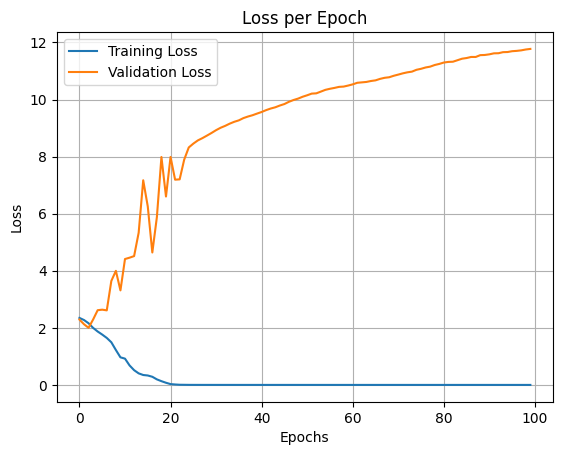

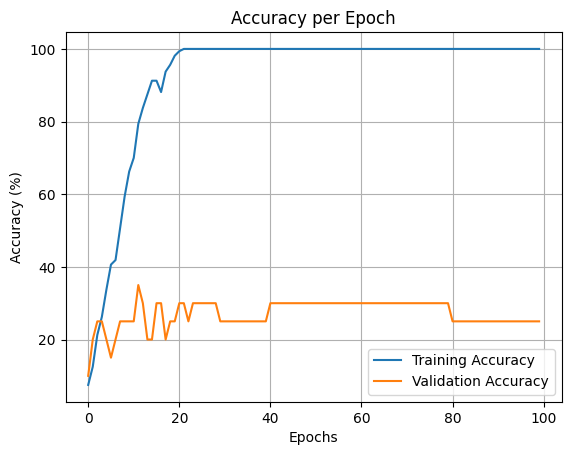

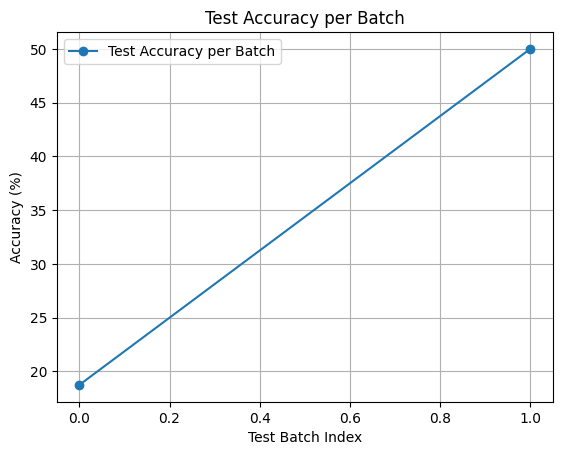

In [11]:
#import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
mini_dataset_dir = "/content/drive/MyDrive/ML_project/mini_dataset"

# Transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder(os.path.join(mini_dataset_dir, "train"), transform=transform)
val_dataset   = datasets.ImageFolder(os.path.join(mini_dataset_dir, "val"), transform=transform)
test_dataset  = datasets.ImageFolder(os.path.join(mini_dataset_dir, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16)
test_loader  = DataLoader(test_dataset, batch_size=16)

# CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(256 * 16 * 16, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = x.view(-1, 256 * 16 * 16)
        x = self.fc(x)
        return x

# Initialization
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists for storing metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
test_losses = []
test_accuracies = []
test_batch_indices = []

# Model training
for epoch in range(100):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_acc = 100 * correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total

    # Сохраняем метрики
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

# Final testing
model.eval()
test_loss, test_correct, test_total = 0, 0, 0
with torch.no_grad():
    for idx, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        acc = 100 * (predicted == labels).sum().item() / labels.size(0)
        test_batch_indices.append(idx)
        test_accuracies.append(acc)

test_loss /= len(test_loader)
total_test_acc = 100 * test_correct / test_total
print(f"\n✅ Test Accuracy: {total_test_acc:.2f}%")

# Metrics visualization
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot of test accuracy per batch
plt.plot(test_batch_indices, test_accuracies, marker='o', linestyle='-', label='Test Accuracy per Batch')
plt.xlabel('Test Batch Index')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy per Batch')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
model_save_path = "/content/drive/MyDrive/ML_project/cnn_model_weights_model_10_Size_256.pth"
torch.save(model.state_dict(), model_save_path)
print(f"💾 Модель успешно сохранена по пути: {model_save_path}")

💾 Модель успешно сохранена по пути: /content/drive/MyDrive/ML_project/cnn_model_weights_model_10_Size_256.pth


In [24]:
import pandas as pd

data_256_3conv = [
    ["Modell", "Convolutional Neural Network (CNN) mit 3 Convolutional Layers"],
    ["Eingabedaten", "RGB-Bilder mit Größe 256×256 Pixel"],
    ["Convolution-Schichten", "Conv2D (3→32), Conv2D (32→64), Conv2D (64→128)"],
    ["Pooling", "MaxPool2D (2×2) nach jeder Convolution-Schicht"],
    ["Fully Connected Layer", "Linear(128×32×32 → 10)"],
    ["Aktivierungsfunktion", "ReLU nach jeder Convolution"],
    ["Verlustfunktion", "Cross Entropy Loss"],
    ["Optimierer", "Adam"],
    ["Lernrate", "0.001"],
    ["Batchgröße", "16"],
    ["Anzahl der Epochen", "100"],
    ["Datenteilung", "Training / Validierung / Test"],
    ["Transformation", "Resize(256×256), ToTensor()"],
    ["Metriken", "Verlust (Loss), Genauigkeit (Accuracy)"],
    ["Gerät", "GPU wenn verfügbar, sonst CPU"],
    ["Modellspeicherung", "Nicht gespeichert"]
]

df_256_3conv = pd.DataFrame(data_256_3conv, columns=["Kategorie", "Beschreibung"])
styled_256_3conv = df_256_3conv.style.set_properties(**{'text-align': 'left'})
styled_256_3conv.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

display(styled_256_3conv)

,Kategorie,Beschreibung
0,Modell,Convolutional Neural Network (CNN) mit 3 Convolutional Layers
1,Eingabedaten,RGB-Bilder mit Größe 256×256 Pixel
2,Convolution-Schichten,"Conv2D (3→32), Conv2D (32→64), Conv2D (64→128)"
3,Pooling,MaxPool2D (2×2) nach jeder Convolution-Schicht
4,Fully Connected Layer,Linear(128×32×32 → 10)
5,Aktivierungsfunktion,ReLU nach jeder Convolution
6,Verlustfunktion,Cross Entropy Loss
7,Optimierer,Adam
8,Lernrate,0.001
9,Batchgröße,16


Epoch 1, Train Loss: 2.9401, Train Accuracy: 10.62%, Val Loss: 2.3043, Val Accuracy: 25.00%
Epoch 2, Train Loss: 2.2637, Train Accuracy: 18.12%, Val Loss: 2.1223, Val Accuracy: 30.00%
Epoch 3, Train Loss: 2.1027, Train Accuracy: 22.50%, Val Loss: 1.9491, Val Accuracy: 35.00%
Epoch 4, Train Loss: 1.8311, Train Accuracy: 38.75%, Val Loss: 1.8324, Val Accuracy: 35.00%
Epoch 5, Train Loss: 1.4533, Train Accuracy: 51.88%, Val Loss: 1.7647, Val Accuracy: 30.00%
Epoch 6, Train Loss: 1.0328, Train Accuracy: 66.88%, Val Loss: 2.0195, Val Accuracy: 25.00%
Epoch 7, Train Loss: 0.5641, Train Accuracy: 81.88%, Val Loss: 1.9295, Val Accuracy: 30.00%
Epoch 8, Train Loss: 0.3446, Train Accuracy: 91.25%, Val Loss: 2.5399, Val Accuracy: 20.00%
Epoch 9, Train Loss: 0.2421, Train Accuracy: 92.50%, Val Loss: 2.3795, Val Accuracy: 40.00%
Epoch 10, Train Loss: 0.1058, Train Accuracy: 98.75%, Val Loss: 2.8664, Val Accuracy: 35.00%
Epoch 11, Train Loss: 0.0777, Train Accuracy: 97.50%, Val Loss: 2.1934, Val Acc

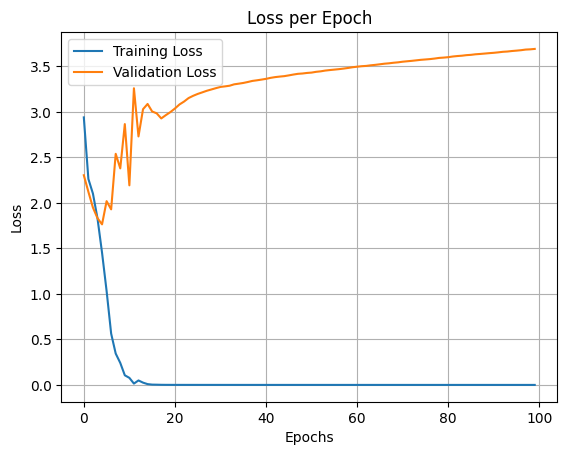

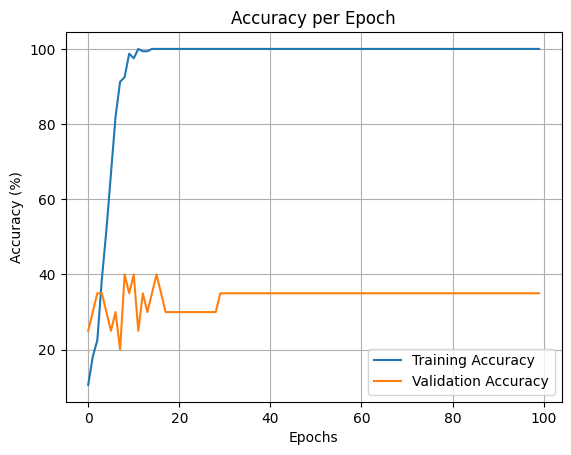

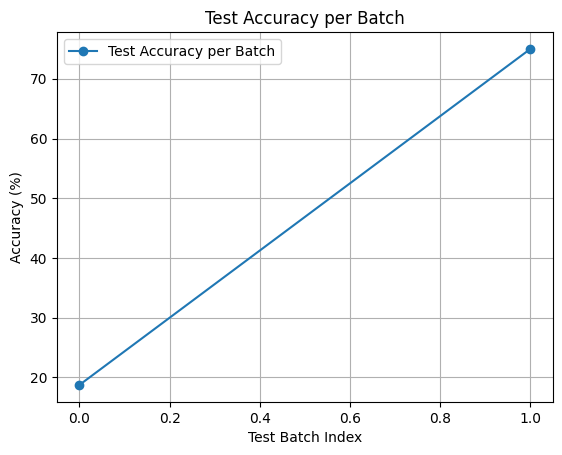

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
data_dir = "/content/drive/MyDrive/ML_project/mini_dataset"

# Transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
val_dataset   = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)
test_dataset  = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16)
test_loader  = DataLoader(test_dataset, batch_size=16)

# CNN Model with 3 convolutional layers
class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(128 * 32 * 32, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Initialize
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Metrics storage
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
test_losses = []
test_accuracies = []
test_batch_indices = []

# Training loop
for epoch in range(100):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_acc = 100 * correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

# Final test
model.eval()
test_loss, test_correct, test_total = 0, 0, 0
with torch.no_grad():
    for idx, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        acc = 100 * (predicted == labels).sum().item() / labels.size(0)
        test_batch_indices.append(idx)
        test_accuracies.append(acc)

test_loss /= len(test_loader)
total_test_acc = 100 * test_correct / test_total
print(f"\n✅ Test Accuracy: {total_test_acc:.2f}%")

# Plot metrics
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(test_batch_indices, test_accuracies, marker='o', linestyle='-', label='Test Accuracy per Batch')
plt.xlabel('Test Batch Index')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy per Batch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_save_path = "/content/drive/MyDrive/ML_project/cnn_model_weights_model_8_Convolutional_3.pth"
torch.save(model.state_dict(), model_save_path)
print(f"💾 Модель успешно сохранена по пути: {model_save_path}")

💾 Модель успешно сохранена по пути: /content/drive/MyDrive/ML_project/cnn_model_weights_model_8_Convolutional_3.pth


In [26]:
import pandas as pd

data_128_lr_004 = [
    ["Modell", "CNN mit 4 Convolutional Layers"],
    ["Eingabedaten", "RGB-Bilder mit Größe 128×128 Pixel"],
    ["Convolution-Schichten", "Conv2D (3→16), Conv2D (16→32), Conv2D (32→64), Conv2D (64→128)"],
    ["Pooling", "MaxPool2D (2×2) nach jeder Convolution-Schicht"],
    ["Fully Connected Layer", "Linear(128×8×8 → 10)"],
    ["Aktivierungsfunktion", "ReLU nach jeder Convolution"],
    ["Verlustfunktion", "Cross Entropy Loss"],
    ["Optimierer", "Adam"],
    ["Lernrate", "0.004"],
    ["Batchgröße", "16"],
    ["Anzahl der Epochen", "100"],
    ["Early Stopping", "Ja (Geduld = 5)"],
    ["Datenteilung", "Training / Validierung / Test"],
    ["Transformation", "Resize(128×128), ToTensor()"],
    ["Metriken", "Loss, Accuracy"],
    ["Gerät", "GPU wenn verfügbar, sonst CPU"],
    ["Modellspeicherung", "best_model.pth (modell mit geringstem Val Loss)"]
]

data_128_lr_004 = pd.DataFrame(data_128_EarlyStopping, columns=["Kategorie", "Beschreibung"])
styled_128_lr_004 = df_128_EarlyStopping.style.set_properties(**{'text-align': 'left'})
styled_128_lr_004.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

display(styled_128_lr_004)

,Kategorie,Beschreibung
0,Modell,CNN mit 4 Convolutional Layers
1,Eingabedaten,RGB-Bilder mit Größe 128×128 Pixel
2,Convolution-Schichten,"Conv2D (3→16), Conv2D (16→32), Conv2D (32→64), Conv2D (64→128)"
3,Pooling,MaxPool2D (2×2) nach jeder Convolution-Schicht
4,Fully Connected Layer,Linear(128×8×8 → 10)
5,Aktivierungsfunktion,ReLU nach jeder Convolution
6,Verlustfunktion,Cross Entropy Loss
7,Optimierer,Adam
8,Lernrate,0.004
9,Batchgröße,16


Epoch 1, Train Loss: 2.4150, Train Acc: 11.25%, Val Loss: 2.3512, Val Acc: 10.00%
Epoch 2, Train Loss: 2.3049, Train Acc: 10.00%, Val Loss: 2.3007, Val Acc: 10.00%
Epoch 3, Train Loss: 2.3037, Train Acc: 8.12%, Val Loss: 2.3037, Val Acc: 15.00%
Epoch 4, Train Loss: 2.3031, Train Acc: 8.12%, Val Loss: 2.3005, Val Acc: 15.00%
Epoch 5, Train Loss: 2.3030, Train Acc: 6.25%, Val Loss: 2.3006, Val Acc: 10.00%
Epoch 6, Train Loss: 2.3028, Train Acc: 10.62%, Val Loss: 2.3099, Val Acc: 10.00%
Epoch 7, Train Loss: 2.3070, Train Acc: 7.50%, Val Loss: 2.2994, Val Acc: 10.00%
Epoch 8, Train Loss: 2.3052, Train Acc: 10.00%, Val Loss: 2.2978, Val Acc: 20.00%
Epoch 9, Train Loss: 2.2993, Train Acc: 15.62%, Val Loss: 2.2858, Val Acc: 10.00%
Epoch 10, Train Loss: 2.2793, Train Acc: 11.25%, Val Loss: 2.2281, Val Acc: 20.00%
Epoch 11, Train Loss: 2.2310, Train Acc: 14.38%, Val Loss: 2.2094, Val Acc: 10.00%
Epoch 12, Train Loss: 2.1431, Train Acc: 20.00%, Val Loss: 2.0405, Val Acc: 25.00%
Epoch 13, Train L

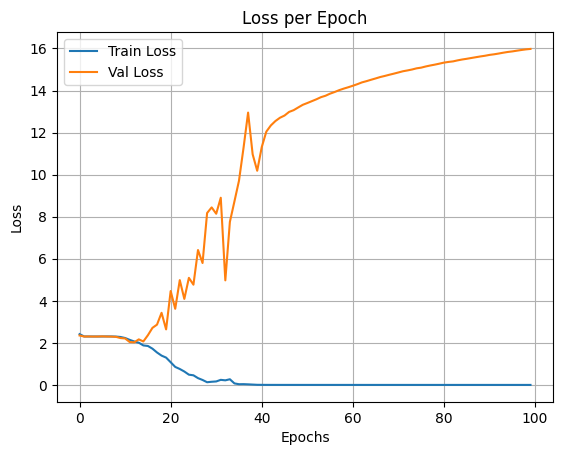

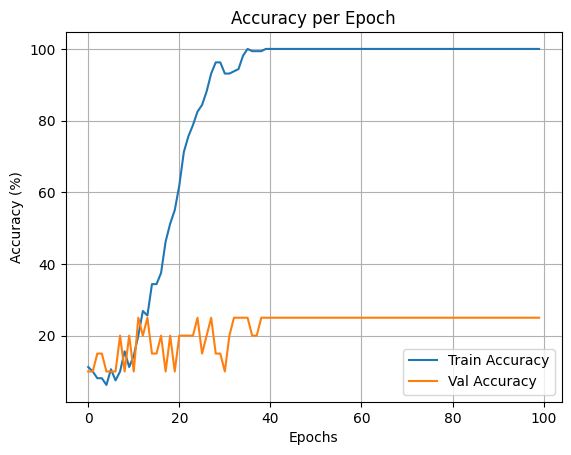

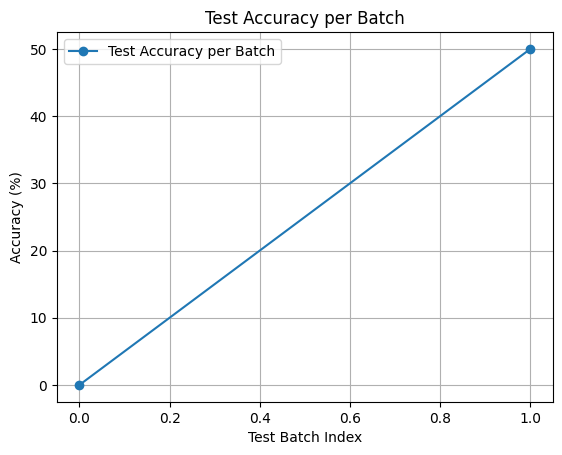

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
mini_dataset_dir = "/content/drive/MyDrive/ML_project/mini_dataset"

# Transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder(os.path.join(mini_dataset_dir, "train"), transform=transform)
val_dataset   = datasets.ImageFolder(os.path.join(mini_dataset_dir, "val"), transform=transform)
test_dataset  = datasets.ImageFolder(os.path.join(mini_dataset_dir, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16)
test_loader  = DataLoader(test_dataset, batch_size=16)

# CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool4 = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(128 * 8 * 8, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.pool4(F.relu(self.conv4(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = self.fc(x)
        return x

# Initialization
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.004)

# Metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early Stopping
best_val_loss = float("inf")
patience = 5
trigger_times = 0

for epoch in range(100):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_acc = 100 * correct / total

    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")



# Load best model
model.load_state_dict(torch.load("best_model.pth"))

# Test
model.eval()
test_loss, test_correct, test_total = 0, 0, 0
test_accuracies, test_batch_indices = [], []

with torch.no_grad():
    for idx, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        acc = 100 * (predicted == labels).sum().item() / labels.size(0)
        test_batch_indices.append(idx)
        test_accuracies.append(acc)

test_loss /= len(test_loader)
print(f"\n✅ Final Test Accuracy: {100 * test_correct / test_total:.2f}%")

# Plots
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(test_batch_indices, test_accuracies, marker='o', linestyle='-', label='Test Accuracy per Batch')
plt.xlabel('Test Batch Index')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy per Batch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_save_path = "/content/drive/MyDrive/ML_project/cnn_model_weights_model_9_LR_004.pth"
torch.save(model.state_dict(), model_save_path)
print(f"💾 Модель успешно сохранена по пути: {model_save_path}")

💾 Модель успешно сохранена по пути: /content/drive/MyDrive/ML_project/cnn_model_weights_model_9_LR_004.pth


In [27]:
import pandas as pd

data_128_3Conv_64start = [
    ["Modell", "CNN mit 3 Convolutional Layers"],
    ["Eingabedaten", "RGB-Bilder mit Größe 128×128 Pixel"],
    ["Convolution-Schichten", "Conv2D (3→64), Conv2D (64→128), Conv2D (128→256)"],
    ["Pooling", "MaxPool2D (2×2) nach jeder Convolution-Schicht"],
    ["Fully Connected Layer", "Linear(256×16×16 → 10)"],
    ["Aktivierungsfunktion", "ReLU nach jeder Convolution"],
    ["Verlustfunktion", "Cross Entropy Loss"],
    ["Optimierer", "Adam"],
    ["Lernrate", "0.001"],
    ["Batchgröße", "16"],
    ["Anzahl der Epochen", "100"],
    ["Datenteilung", "Training / Validierung / Test"],
    ["Transformation", "Resize(128×128), ToTensor()"],
    ["Metriken", "Loss, Accuracy"],
    ["Gerät", "GPU wenn verfügbar, sonst CPU"],
    ["Modellspeicherung", "Nicht explizit gespeichert"]
]

df_128_3Conv_64start = pd.DataFrame(data_128_3Conv_64start, columns=["Kategorie", "Beschreibung"])
styled_128_3Conv_64start = df_128_3Conv_64start.style.set_properties(**{'text-align': 'left'})
styled_128_3Conv_64start.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

display(styled_128_3Conv_64start)

,Kategorie,Beschreibung
0,Modell,CNN mit 3 Convolutional Layers
1,Eingabedaten,RGB-Bilder mit Größe 128×128 Pixel
2,Convolution-Schichten,"Conv2D (3→64), Conv2D (64→128), Conv2D (128→256)"
3,Pooling,MaxPool2D (2×2) nach jeder Convolution-Schicht
4,Fully Connected Layer,Linear(256×16×16 → 10)
5,Aktivierungsfunktion,ReLU nach jeder Convolution
6,Verlustfunktion,Cross Entropy Loss
7,Optimierer,Adam
8,Lernrate,0.001
9,Batchgröße,16


Epoch 1, Train Loss: 2.4413, Train Accuracy: 9.38%, Val Loss: 2.2732, Val Accuracy: 20.00%
Epoch 2, Train Loss: 2.2729, Train Accuracy: 13.12%, Val Loss: 2.1212, Val Accuracy: 20.00%
Epoch 3, Train Loss: 2.1698, Train Accuracy: 16.88%, Val Loss: 2.0986, Val Accuracy: 20.00%
Epoch 4, Train Loss: 2.0365, Train Accuracy: 27.50%, Val Loss: 2.1882, Val Accuracy: 15.00%
Epoch 5, Train Loss: 1.9222, Train Accuracy: 30.62%, Val Loss: 2.3928, Val Accuracy: 30.00%
Epoch 6, Train Loss: 1.6976, Train Accuracy: 35.62%, Val Loss: 2.5481, Val Accuracy: 30.00%
Epoch 7, Train Loss: 1.4739, Train Accuracy: 51.25%, Val Loss: 3.2985, Val Accuracy: 35.00%
Epoch 8, Train Loss: 1.2701, Train Accuracy: 55.62%, Val Loss: 2.6267, Val Accuracy: 35.00%
Epoch 9, Train Loss: 0.8463, Train Accuracy: 76.25%, Val Loss: 2.8931, Val Accuracy: 35.00%
Epoch 10, Train Loss: 0.5973, Train Accuracy: 78.75%, Val Loss: 4.1043, Val Accuracy: 40.00%
Epoch 11, Train Loss: 0.4951, Train Accuracy: 83.12%, Val Loss: 2.4175, Val Accu

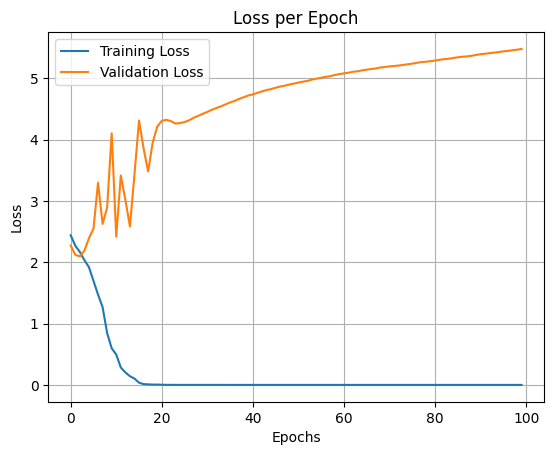

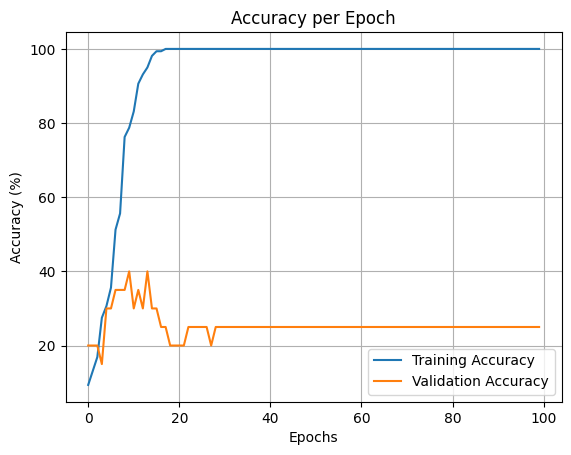

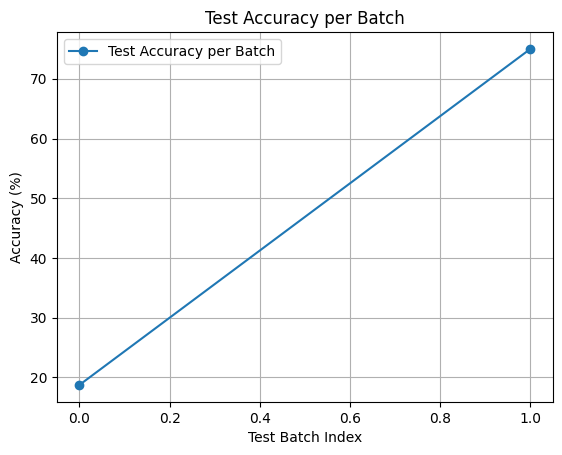

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
data_dir = "/content/drive/MyDrive/ML_project/mini_dataset"

# Transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
val_dataset   = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=transform)
test_dataset  = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16)
test_loader  = DataLoader(test_dataset, batch_size=16)

# CNN Model with 3 convolutional layers
class CNNModel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(256 * 16 * 16, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Initialize
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Metrics storage
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
test_losses = []
test_accuracies = []
test_batch_indices = []

# Training loop
for epoch in range(100):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = total_loss / len(train_loader)
    train_acc = 100 * correct / total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_loss /= len(val_loader)
    val_acc = 100 * val_correct / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

# Final test
model.eval()
test_loss, test_correct, test_total = 0, 0, 0
with torch.no_grad():
    for idx, (images, labels) in enumerate(test_loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

        acc = 100 * (predicted == labels).sum().item() / labels.size(0)
        test_batch_indices.append(idx)
        test_accuracies.append(acc)

test_loss /= len(test_loader)
total_test_acc = 100 * test_correct / test_total
print(f"\n✅ Test Accuracy: {total_test_acc:.2f}%")

# Plot metrics
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(test_batch_indices, test_accuracies, marker='o', linestyle='-', label='Test Accuracy per Batch')
plt.xlabel('Test Batch Index')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy per Batch')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
model_save_path = "/content/drive/MyDrive/ML_project/cnn_model_weights_model_10_Filter64.pth"
torch.save(model.state_dict(), model_save_path)
print(f"💾 Модель успешно сохранена по пути: {model_save_path}")

💾 Модель успешно сохранена по пути: /content/drive/MyDrive/ML_project/cnn_model_weights_model_10_Filter64.pth
